##**MNIST Dataset**
The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students. The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API.

In [2]:
import tensorflow
tensorflow.__version__


'2.14.0'

In [2]:
#pip install --upgrade keras

In [4]:
# Initialize the random number generator

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting library
%matplotlib inline
from keras.models import Sequential
import tensorflow
from tensorflow.keras.optimizers import Adam # - Works ,RMSprop
from tensorflow.keras.utils import to_categorical, plot_model
from keras import  backend as K
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten

import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

##**Load MNIST dataset**

In [5]:
from tensorflow.keras.datasets import mnist

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


######**Visualizing some numbers**

Label: 7


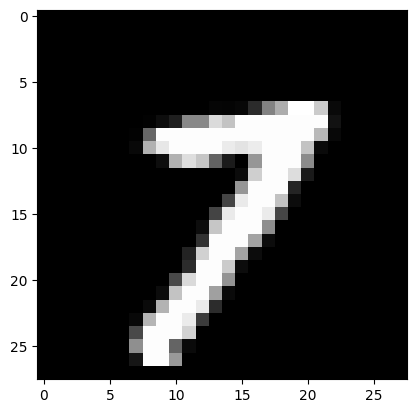

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[40000]))
plt.imshow(X_train[40000], cmap='gray')

##**Data Preprocessing**

####**Data Shape**

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


####**Reshape train and test sets into compatible shapes**
- Sequential model in tensorflow.keras expects data to be in the format (n_e, n_h, n_w, n_c)
- n_e= number of examples, n_h = height, n_w = width, n_c = number of channels
- do not reshape labels

In [48]:
X_train.shape[0]

60000

In [9]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [10]:
X_train.shape

(60000, 28, 28, 1)

####**Normalize data**

- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes with 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division




In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

####**Print shape of data and number of images**

1.   List item
2.   List item


- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [12]:
print("X_train shape:", X_train.shape)
print("Images in X_train:", X_train.shape[0])
print("Images in X_test:", X_test.shape[0])
print("Max value in X_train:", X_train.max())
print("Min value in X_train:", X_train.min())

X_train shape: (60000, 28, 28, 1)
Images in X_train: 60000
Images in X_test: 10000
Max value in X_train: 1.0
Min value in X_train: 0.0


####**One-hot encode the class vector**
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 10
- we are doing this to use categorical_crossentropy as loss

In [13]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# print("Shape of y_train:", y_train.shape)
# print("One value of y_train:", y_train[0])

##**Building Convolutional Neural Network : ConvNet/CNN**

#### Initialize a sequential model again
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes

In [14]:
from tensorflow.keras.layers import Conv2D

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

####**Compile and fit the model**
- let's compile our model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "adam"
- then next step will be to fit model
    - give train data - training features and labels
    - batch size: 32
    - epochs: 10
    - give validation data - testing features and labels

In [15]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Fit the model
H = model.fit( x=X_train, y=y_train, batch_size=32, epochs=10, validation_split = 0.3)

Epoch 1/10


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1313/1313 [==============================] - ETA: 0s - loss: 0.1386 - accuracy: 0.9574

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1313/1313 [==============================] - 24s 9ms/step - loss: 0.1386 - accuracy: 0.9574 - val_loss: 0.0737 - val_accuracy: 0.9779
Epoch 2/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0430 - accuracy: 0.9864 - val_loss: 0.0644 - val_accuracy: 0.9809
Epoch 3/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0244 - accuracy: 0.9919 - val_loss: 0.0663 - val_accuracy: 0.9804
Epoch 4/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0157 - accuracy: 0.9949 - val_loss: 0.0635 - val_accuracy: 0.9850
Epoch 5/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0126 - accura

####**Final loss and accuracy**

In [16]:
loss, acc = model.evaluate(X_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.0582 - accuracy: 0.9884

Test accuracy: 98.8%


In [17]:
loss, acc = model.evaluate(X_train, y_train)
print("\nTraining accuracy: %.1f%%" % (100.0 * acc))

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0244 - accuracy: 0.9955

Training accuracy: 99.6%


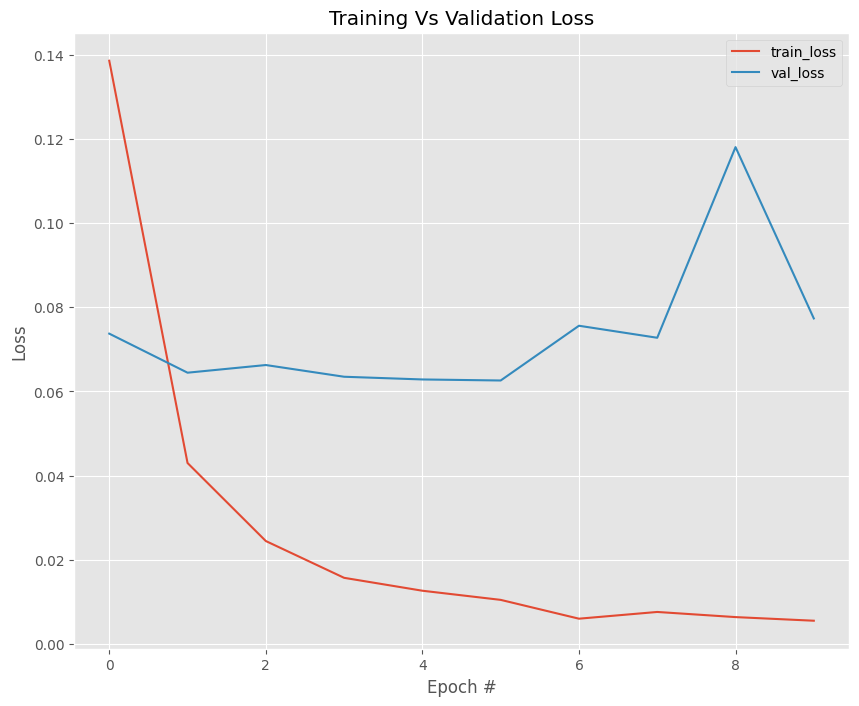

In [18]:
import matplotlib.pyplot as plt


epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))
plt.style.use("ggplot")


# plot training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

##**Vanilla CNN + Pooling + Dropout + Regularization**


#### Initialize a sequential model again
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- add a max pooling layer of size 2x2
- add a dropout layer
    - dropout layers fight with the overfitting by disregarding some of the neurons while training
    - use dropout rate 0.2
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D

# Initialize the model
model = Sequential()

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu'
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu'
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))

# Add a MaxPooling Layer of size 2X2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Apply Dropout with 0.2 probability
model.add(Dropout(rate=0.2))

# Flatten the layer
model.add(Flatten())

# Add Fully Connected Layer with 128 units and activation function as 'relu'
model.add(Dense(128, activation="relu")) # you can add regularization also : kernel_regularizer=tensorflow.keras.regularizers.l2(0.1)
#model.add(Dropout(rate=0.2))
#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(10, activation="softmax"))

####**Compile and fit the model**
- let's compile our model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "adam"
- Use EarlyStopping
- then next step will be to fit model
    - give train data - training features and labels
    - batch size: 32
    - epochs: 10
    - give validation data - testing features and labels

In [41]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Use earlystopping
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01) #min_delta: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.

# Fit the model
H = model.fit(x=X_train, y=y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), callbacks=[callback])

Epoch 1/10


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1869/1875 [============================>.] - ETA: 0s - loss: 0.1263 - accuracy: 0.9612

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1261 - accuracy: 0.9613 - val_loss: 0.0544 - val_accuracy: 0.9814
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0435 - accuracy: 0.9864 - val_loss: 0.0369 - val_accuracy: 0.9869
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0291 - accuracy: 0.9904 - val_loss: 0.0319 - val_accuracy: 0.9899


####**Final loss and accuracy**

In [42]:
loss, acc = model.evaluate(X_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.0319 - accuracy: 0.9899

Test accuracy: 99.0%


In [43]:
loss, acc = model.evaluate(X_train, y_train)
print("\nTraining accuracy: %.1f%%" % (100.0 * acc))

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0132 - accuracy: 0.9958

Training accuracy: 99.6%


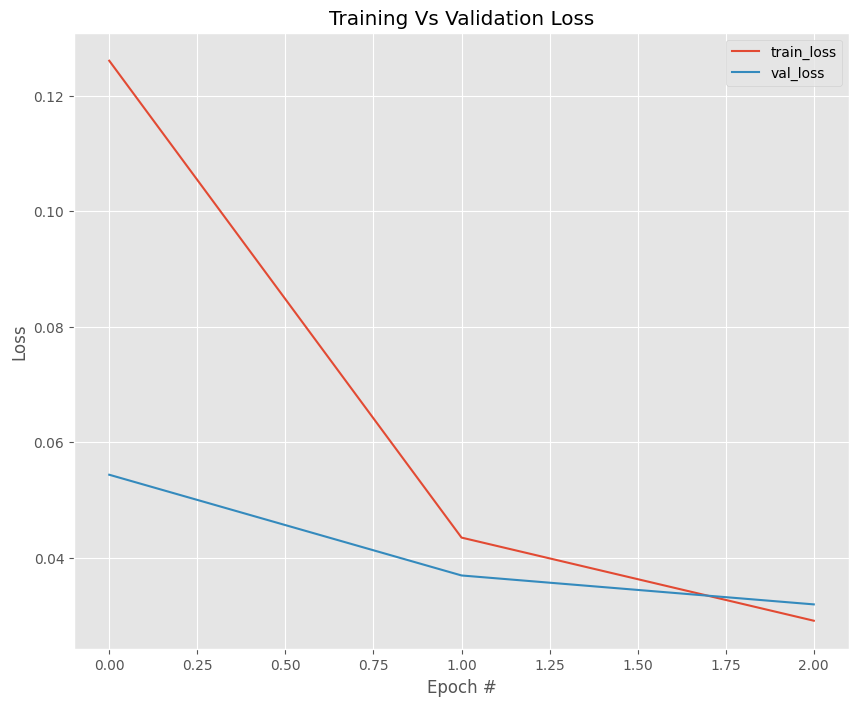

In [44]:
import matplotlib.pyplot as plt


epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))
plt.style.use("ggplot")


# plot training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

##**Make Prediction**

1/1 [==============================] - 0s 24ms/step
Predicted label: 8
Softmax Outputs: [[1.7889332e-04 1.0820273e-08 3.8697502e-07 4.4261574e-04 1.2067532e-07
  3.6119661e-06 1.2981253e-03 1.3092382e-08 9.9792528e-01 1.5097507e-04]]
1.0


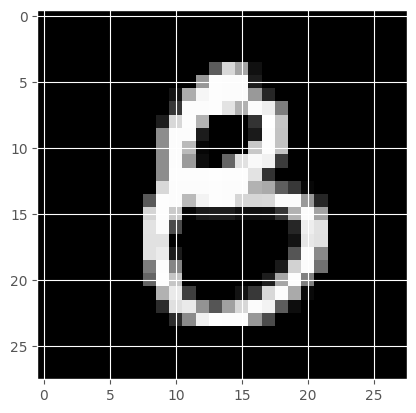

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_test[800].reshape(28, 28), cmap='gray')
y_pred = model.predict(X_test[800].reshape(1, 28, 28, 1)) #No.of images, Height, width, channel
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())